<a href="https://colab.research.google.com/github/rajanpandi/dvd_data/blob/main/finalproject_churn_pred.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [2]:
df=pd.read_csv("/content/combine1_data.csv")


In [3]:
df.isnull().sum()

,0
category_id,5
name,5
film_id,5
title,5
description,5
release_year,5
language_id,5
rental_duration,5
rental_rate,5
length,5


In [4]:
df.dropna(inplace=True)

In [5]:
df.isnull().sum()

,0
category_id,0
name,0
film_id,0
title,0
description,0
release_year,0
language_id,0
rental_duration,0
rental_rate,0
length,0


In [6]:
df.duplicated().sum()

0

In [7]:
df.dtypes

,0
category_id,float64
name,object
film_id,float64
title,object
description,object
release_year,float64
language_id,float64
rental_duration,float64
rental_rate,float64
length,float64


In [8]:
df["rental_date"] = pd.to_datetime(df["rental_date"]).dt.strftime('%Y-%m-%d')
df["rental_date"] = pd.to_datetime(df["rental_date"],format="%Y-%m-%d")
df["return_date"] = pd.to_datetime(df["return_date"]).dt.strftime('%Y-%m-%d')
df["return_date"] = pd.to_datetime(df["return_date"],format="%Y-%m-%d")
# payment_date
df["payment_date"] = pd.to_datetime(df["payment_date"]).dt.strftime('%Y-%m-%d')
df["payment_date"] = pd.to_datetime(df["payment_date"],format="%Y-%m-%d")

In [9]:
for i in df.columns:
  if df[i].dtypes=="object":
    print(i)
    print(df[i].nunique())

name
16
title
955
description
955
rating
5
first_name
128
last_name
121
name-2
1


In [10]:
df["name-2"].value_counts()

,count
name-2,
English,79106


In [11]:
df.columns

Index(['category_id', 'name', 'film_id', 'title', 'description',
       'release_year', 'language_id', 'rental_duration', 'rental_rate',
       'length', 'replacement_cost', 'rating', 'inventory_id', 'store_id',
       'rental_id', 'rental_date', 'customer_id', 'return_date', 'staff_id',
       'amount', 'payment_id', 'payment_date', 'actor_id', 'first_name',
       'last_name', 'name-2'],
      dtype='object')

In [12]:
df1=df.copy()

In [13]:
pd.set_option('display.max_columns', None)

In [14]:
df.head(1)

,category_id,name,film_id,title,description,release_year,language_id,rental_duration,rental_rate,length,replacement_cost,rating,inventory_id,store_id,rental_id,rental_date,customer_id,return_date,staff_id,amount,payment_id,payment_date,actor_id,first_name,last_name,name-2
0,11.0,Horror,749.0,Rules Human,A Beautiful Epistle of a Astronaut And a Stude...,2006.0,1.0,6.0,4.99,153.0,19.99,R,3419.0,1.0,1520.0,2005-06-15,341.0,2005-06-24,1.0,7.99,17503.0,2007-02-15,161.0,Harvey,Hope,English


In [ ]:
# df.drop(["category_id","film_id","title","language_id","rental_duration","replacement_cost","inventory_id","store_id","rental_id","return_date","staff_id","payment_id",],axis=1,inplace=True)

In [16]:
df["rental_month"]=df["rental_date"].dt.month
df["rental_year"]=df["rental_date"].dt.year
df["return_month"]=df["return_date"].dt.month
df["renturn_year"]=df["return_date"].dt.year

In [15]:
df["rental_month"] = df["rental_date"].dt.month
df["rental_year"] = df["rental_date"].dt.year
# df["rental_day_week"] = df["rental_date"].dt.day_of_week

In [18]:
df = df[["category_id", "rental_duration", "rental_rate", "length", "replacement_cost", "rating",
         "inventory_id", "store_id", "rental_id", "customer_id", "actor_id",
         "return_month", "renturn_year", "rental_month", "rental_year"]]


In [19]:
df.head(1)

,category_id,rental_duration,rental_rate,length,replacement_cost,rating,inventory_id,store_id,rental_id,customer_id,actor_id,return_month,renturn_year,rental_month,rental_year
0,11.0,6.0,4.99,153.0,19.99,R,3419.0,1.0,1520.0,341.0,161.0,6,2005,6,2005


In [20]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [21]:
for i in df.columns:
  if df[i].dtypes=="object":
    df[i]=le.fit_transform(df[i])


<ipython-input-21-496903a60657>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[i]=le.fit_transform(df[i])


In [22]:
df.columns

Index(['category_id', 'rental_duration', 'rental_rate', 'length',
       'replacement_cost', 'rating', 'inventory_id', 'store_id', 'rental_id',
       'customer_id', 'actor_id', 'return_month', 'renturn_year',
       'rental_month', 'rental_year'],
      dtype='object')

In [24]:
df.head(1)

,category_id,rental_duration,rental_rate,length,replacement_cost,rating,inventory_id,store_id,rental_id,customer_id,actor_id,return_month,renturn_year,rental_month,rental_year
0,11.0,6.0,4.99,153.0,19.99,4,3419.0,1.0,1520.0,341.0,161.0,6,2005,6,2005


In [25]:
df.dtypes

,0
category_id,float64
rental_duration,float64
rental_rate,float64
length,float64
replacement_cost,float64
rating,int64
inventory_id,float64
store_id,float64
rental_id,float64
customer_id,float64


In [26]:
from sklearn.cluster import KMeans

In [27]:
model = KMeans(n_clusters=2)

In [28]:
model.fit(df)

KMeans(n_clusters=2)

In [29]:
group = model.predict(df)
group

array([1, 1, 1, ..., 1, 1, 1], dtype=int32)

In [30]:
df["churn"]=group
df.head(1)

<ipython-input-30-f3e907cddc42>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["churn"]=group


,category_id,rental_duration,rental_rate,length,replacement_cost,rating,inventory_id,store_id,rental_id,customer_id,actor_id,return_month,renturn_year,rental_month,rental_year,churn
0,11.0,6.0,4.99,153.0,19.99,4,3419.0,1.0,1520.0,341.0,161.0,6,2005,6,2005,1


In [34]:
df["churn"].value_counts()

,count
churn,
0,39660
1,39446


In [35]:
df[df["churn"] == 1].head(5)

,category_id,rental_duration,rental_rate,length,replacement_cost,rating,inventory_id,store_id,rental_id,customer_id,actor_id,return_month,renturn_year,rental_month,rental_year,churn
0,11.0,6.0,4.99,153.0,19.99,4,3419.0,1.0,1520.0,341.0,161.0,6,2005,6,2005,1
1,11.0,6.0,4.99,153.0,19.99,4,3419.0,1.0,1520.0,341.0,127.0,6,2005,6,2005,1
2,11.0,6.0,4.99,153.0,19.99,4,3419.0,1.0,1520.0,341.0,77.0,6,2005,6,2005,1
3,11.0,6.0,4.99,153.0,19.99,4,3419.0,1.0,1520.0,341.0,59.0,6,2005,6,2005,1
4,11.0,6.0,4.99,153.0,19.99,4,3419.0,1.0,1520.0,341.0,1.0,6,2005,6,2005,1


In [38]:
filter1=df[(df["churn"] == 1) & (df["customer_id"].isin(df["customer_id"].unique())) & (df["rental_month"].isin(df["rental_month"].unique())) &(df["actor_id"].isin(df["actor_id"].unique())) ].drop(columns=["rental_duration", "rental_rate", "length", "rating","replacement_cost","inventory_id","store_id","rental_id","rental_year"]).value_counts()



In [39]:
filter1

category_id  customer_id  actor_id  return_month  renturn_year  rental_month  churn
13.0         182.0        189.0     7             2005          7             1        5
                          184.0     7             2005          7             1        5
                          116.0     7             2005          7             1        5
                          75.0      7             2005          7             1        5
                          53.0      7             2005          7             1        5
                                                                                      ..
6.0          115.0        84.0      7             2005          7             1        1
                          96.0      6             2005          6             1        1
                          104.0     6             2005          6             1        1
                          123.0     7             2005          7             1        1
16.0         599.0        171.0     7             2005          7             1        1
Name: count, Length: 39154, dtype: int64

In [41]:

# Apply the filter and drop the specified columns
filter3 = df[(df["churn"] == 1) &
             (df["customer_id"].isin(df["customer_id"].unique())) &
             (df["rental_month"].isin(df["rental_month"].unique())) &
             (df["return_month"].isin(df["return_month"].unique())) &
             (df["inventory_id"].isin(df["inventory_id"].unique()))].drop(
                 columns=["rental_duration", "rental_rate", "length", "rating",
                          "replacement_cost", "store_id", "rental_id", "rental_year",
                           "actor_id"]
             )

# Use groupby on all the remaining columns and count occurrences of each unique combination
grouped_filter3 = filter3.groupby(list(filter3.columns)).size().reset_index(name='count')

# Add a new column with the count of each category_id
# Group by 'category_id' to get the count for each category
category_counts = filter3.groupby('category_id').size().reset_index(name='category_count')

# Merge the grouped results with the category count
merged_result = pd.merge(grouped_filter3, category_counts, on='category_id', how='left')

# Display the final result with both counts
merged_result

,category_id,inventory_id,customer_id,return_month,renturn_year,rental_month,churn,count,category_count
0,1.0,94.0,34.0,6,2005,6,1,6,2851
1,1.0,94.0,254.0,7,2005,7,1,6,2851
2,1.0,95.0,36.0,7,2005,7,1,6,2851
3,1.0,95.0,483.0,6,2005,6,1,6,2851
4,1.0,95.0,487.0,8,2005,7,1,6,2851
...,...,...,...,...,...,...,...,...,...
7175,16.0,4533.0,429.0,7,2005,7,1,5,2069
7176,16.0,4534.0,46.0,6,2005,6,1,5,2069
7177,16.0,4534.0,414.0,7,2005,7,1,5,2069
7178,16.0,4535.0,66.0,7,2005,7,1,5,2069


In [42]:
df.columns

Index(['category_id', 'rental_duration', 'rental_rate', 'length',
       'replacement_cost', 'rating', 'inventory_id', 'store_id', 'rental_id',
       'customer_id', 'actor_id', 'return_month', 'renturn_year',
       'rental_month', 'rental_year', 'churn'],
      dtype='object')

In [43]:
x=df.drop("churn",axis=1)
y=df["churn"]

In [44]:
x.shape,y.shape

((79106, 15), (79106,))

In [45]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)

In [46]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [49]:
import tensorflow as tf
from tensorflow import keras

model=keras.Sequential([
    keras.layers.Dense(45,input_shape=(15,),activation="relu"),
    keras.layers.Dense(30,activation="relu"),
    keras.layers.Dense(15,activation="relu"),
    keras.layers.Dense(1,activation="sigmoid")
])
model.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [50]:
result=model.fit(x_train,y_train,epochs=20,validation_split=.2,batch_size=32)

Epoch 1/20
1583/1583 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9467 - loss: 0.1408 - val_accuracy: 0.9946 - val_loss: 0.0148
Epoch 2/20
1583/1583 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9951 - loss: 0.0127 - val_accuracy: 0.9968 - val_loss: 0.0087
Epoch 3/20
1583/1583 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9968 - loss: 0.0075 - val_accuracy: 0.9976 - val_loss: 0.0064
Epoch 4/20
1583/1583 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9989 - loss: 0.0038 - val_accuracy: 0.9981 - val_loss: 0.0038
Epoch 5/20
1583/1583 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9989 - loss: 0.0034 - val_accuracy: 0.9993 - val_loss: 0.0022
Epoch 6/20
1583/1583 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9990 - loss: 0.0028 - val_accuracy: 0.9987 - val_loss: 0.0028
Epoch 7/20
1583/1583 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9996 - loss: 0.0012 - val_accuracy: 0.9979 - val_loss: 0.0058
Epoch 8/20
1583/1583 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9997 - loss: 0.0011 - 

In [51]:
model.evaluate(x_test,y_test)

495/495 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9998 - loss: 5.5485e-04


[0.00032904770341701806, 0.9999368190765381]

In [52]:
yp=model.predict(x_test)
yp[:5]

495/495 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([[1.000000e+00],
       [2.200305e-25],
       [1.000000e+00],
       [1.000000e+00],
       [1.000000e+00]], dtype=float32)

In [53]:
y_pred=[]
for i in yp:
  if i>=0.5:
    y_pred.append(1)
  else:
    y_pred.append(0)

In [54]:
y_test[:5]

,churn
313,1
61853,0
67654,1
58588,1
49252,1


In [55]:
y_pred[:5]

[1, 0, 1, 1, 1]

In [56]:
from sklearn.metrics import confusion_matrix,classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7918
           1       1.00      1.00      1.00      7904

    accuracy                           1.00     15822
   macro avg       1.00      1.00      1.00     15822
weighted avg       1.00      1.00      1.00     15822



In [57]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9999367968651245

Text(95.72222222222221, 0.5, 'Truth')

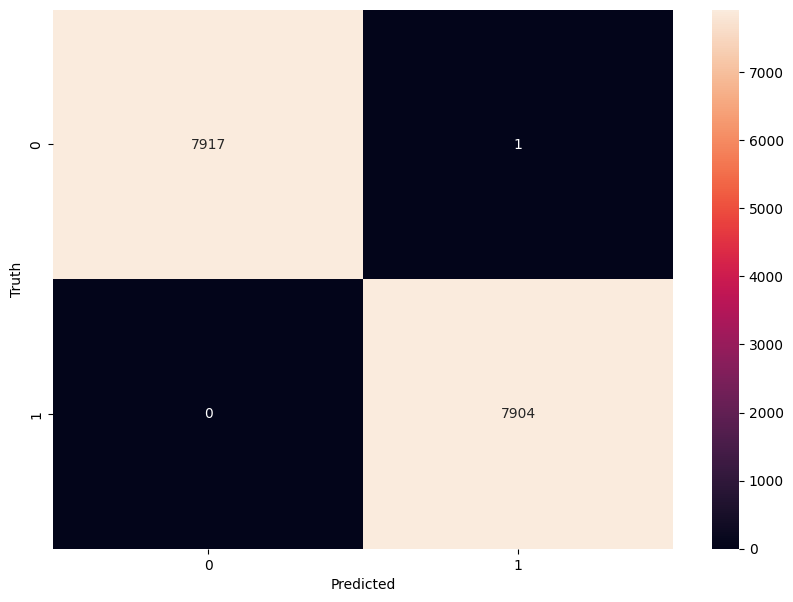

In [58]:
import seaborn as sns
import matplotlib.pyplot as plt
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_pred)
plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True,fmt="d")
plt.xlabel("Predicted")
plt.ylabel("Truth")